In [ ]:
!git clone https://github.com/overtunned/Object-classification-using-cnn-motorcycle.git

Cloning into 'Object-classification-using-cnn-motorcycle'...
remote: Enumerating objects: 21762, done.
remote: Counting objects: 100% (2017/2017), done.
remote: Compressing objects: 100% (2005/2005), done.
remote: Total 21762 (delta 13), reused 2011 (delta 10), pack-reused 19745
Receiving objects: 100% (21762/21762), 906.85 MiB | 24.67 MiB/s, done.
Resolving deltas: 100% (28/28), done.
Checking out files: 100% (21908/21908), done.


In [ ]:
!ls Object-classification-using-cnn-motorcycle

1.mat		  Object_Detection_Using_CNN.ipynb
alexnet_11am	  predict-image-category-from-256-categories-new.ipynb
alexnet_11am.zip  README
dataset		  README.md
media


In [ ]:
import pandas as pd
import numpy as np
import os
from os import listdir
from glob import glob
import itertools
import fnmatch
import random
from PIL import Image
import zlib
import itertools
import csv
import math
from tqdm import tqdm
import matplotlib.pylab as plt
import seaborn as sns
import cv2
import skimage
from skimage import transform
from skimage.transform import resize
import scipy
from scipy import misc
import keras
from keras import backend as K
from keras import models, layers, optimizers
# from keras.applications.inception_v3 import InceptionV3
# from keras.applications.vgg16 import preprocess_input, VGG16
from keras.models import Model, Sequential, model_from_json
from keras.layers import Dense, Dropout, Input, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D, Lambda, AveragePooling2D
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score,classification_report
from sklearn.utils import class_weight
%matplotlib inline

In [ ]:
#@title
# #@title
# import cv2
# import scipy.io as sio
# from os import listdir
# from os.path import isfile,join,isdir
# import numpy as np
# from matplotlib.path import Path
# import os

# """ Caltech-101 dataset has images belonging to 101 different Categories. The dataset also provides us with annotation 
# for each image which helps us to crop the foreground image and get rid of background in the image.

# In this file the foreground/area of intereset in the image is cropped by ignoring the background
#  and all the cropped out images are written to a folder and also values of each and every image is appended
#  in array and stored in .mat file in order to avoid converting image to array every time we run the program
# """
# def load_data_shared():

# # Navigate to  main directory in which there are 101 subdirectories containing images.
#     mypath = '/Users/manaswipodduturi/Documents/Research/MachineLearning/Data/Caltech/101_ObjectCategories'
# # Process all the folders in the main directory
#     folders = [folder for folder in listdir(mypath) if isdir(join(mypath,folder))]
#     all_images = np.array([])
#     all_labels = np.array([],dtype=np.uint8)
# # Process all the images in each and every folder in the main directory.
#     for j in xrange(0,len(folders)):
#       files = [file for file in listdir(join(mypath,folders[j])) if (isfile(join(mypath,folders[j],file)) & bool(file!='.DS_Store')) ]
#       images = np.empty(len(files),dtype=object)
#       labels = np.empty(len(files),dtype=np.uint8)
#   #Convert each and every image to array and append array values of all the images
#       for n in xrange(0,len(files)):
#           images[n] = cv2.imread(join(mypath,folders[j],files[n]))
#           labels.fill(j)
#       all_images = np.append(all_images,images)
#       all_labels = np.append(all_labels,labels)

# # Navigate to  main directory in which there are 101 subdirectories containing annotation of each image.
#     mypath = '/Users/manaswipodduturi/Documents/Research/MachineLearning/Data/Caltech/Annotations'
#     folders = [folder for folder in listdir(mypath) if isdir(join(mypath,folder))]
#     all_annotations = np.array([])
#     for j in xrange(0,len(folders)):
#         files = [file for file in listdir(join(mypath,folders[j])) if (isfile(join(mypath,folders[j],file)) & bool(file!='.DS_Store'))]
#         annotations = np.empty(len(files),dtype=object)
# # Get array of annotations for each image from .mat file and append annotations of all the images
#         for n in xrange(0,len(files)):
#             annotations[n] = sio.loadmat(join(mypath,folders[j],files[n]))
#         all_annotations = np.append(all_annotations,annotations)

# # Navigate to  directory where you want to write cropped images.
#     os.chdir('/Users/manaswipodduturi/Documents/Research/MachineLearning/Data/Caltech/processed_images1')
#     image_with_annotation = np.empty((all_images.shape[0],150*100),dtype=object)
#     for i in xrange(0,all_images.shape[0]):
#         image = all_images[i]
#         image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# # Contour is a rough coordinates, which help us find the area of interest in the image
#         contour = all_annotations[i]['obj_contour']
# #Box coordinates provides us with rough rectangular outline of our area of interest in the image
#         box = all_annotations[i]['box_coord']
#         contour = np.transpose(contour)
#         contour[:,0]=contour[:,0]+box[:,2]
#         contour[:,1]=contour[:,1]+box[:,0]
# # Outline/sketch the ares of interest in the image and find all the points inside that region
#         p= Path(contour[:-2])
#         mask = np.zeros((image.shape),dtype=np.uint8)
#         for y in xrange(box[0,0],box[0,1]+1):
#             for x in xrange(box[0,2],box[0,3]+1):
#                 bool_value = p.contains_point([x,y])
#                 if bool_value:
#                     mask[y-1,x-1]=1
#         image = image*mask
# #Write crooped out image to the subfolder
#         #cv2.imwrite('image'+str(i+1)+'.jpg',image)
# #append value of each image to an array
#         image = cv2.resize(image, (100,150))
#         image_with_annotation[i] = np.ravel(image)
#     sio.savemat('/Users/manaswipodduturi/Documents/Research/MachineLearning/NeuralNets/Caltech/caltech_data.mat',
#         {'features':image_with_annotation,
#          'labels' : all_labels})

In [ ]:
#@title
# import scipy.io as sio
# annot = sio.loadmat(path+'1.mat')
# coor = annot['SubDir_Data'].T
# print(coor[0,:])
# x1, y1 = int(coor[0,2]),int(coor[0,3])
# x2, y2 = int(coor[0,6]),int(coor[0,7])

In [ ]:
#@title
# img = cv2.imread(path+'/1/0001.jpg')
# plt.imshow(img[y1:y2,x1:x2])

In [ ]:
path ='Object-classification-using-cnn-motorcycle/dataset/'

In [ ]:
def loadBatchImages(path):
    catList = listdir(path)
    loadedImagesTrain = []
    loadedLabelsTrain = []
    loadedImagesVal = []
    loadedLabelsVal = []
    for cat in catList:
        deepPath = path+cat+"/"
        imageList = listdir(deepPath)
        for images in imageList:                
            img = cv2.imread(deepPath + images)
            img = cv2.resize(img, (224,224))
            loadedLabelsTrain.append(int(cat))
            loadedImagesTrain.append(img)
    return loadedImagesTrain,to_categorical(loadedLabelsTrain)

In [ ]:
def shuffledSet(a, b, test_proportion=0.2, val_proportion=0.2):
    assert np.shape(a)[0] == np.shape(b)[0]
    p = np.random.permutation(np.shape(a)[0])
    num_test = math.ceil(len(p)* test_proportion)
    num_val = math.ceil(len(p) * val_proportion)
    s1 = p[num_test + num_val:]
    s2 = p[num_test: num_test + num_val]
    s3 = p[0:num_test]
    return (a[s1], b[s1]), (a[s2], b[s2]), (a[s3], b[s3])

In [ ]:
data, labels = loadBatchImages(path)

In [ ]:
# data = preprocess_input(np.float64(data))
# dataVal = preprocess_input(np.float64(dataVal))
train, val, test = shuffledSet(np.asarray(data),labels,0.2,0.1)
# val = shuffledSet(np.asarray(dataVal),labelsVal)

In [ ]:
# Split out features and labels
X_train, y_train = train[0], train[1]
X_val, y_val = val[0], val[1]
X_test, y_test = test[0],test[1]

In [ ]:
#already 4 dimensional
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(2849, 224, 224, 3)
(814, 224, 224, 3)
(407, 224, 224, 3)


In [ ]:
# STOP: Do not change the tests below. Your implementation should pass these tests.
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (224, 224, 3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_val.shape[1:] == (224, 224, 3)), "The dimensions of the images are not 32 x 32 x 3."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (224, 224, 3)), "The dimensions of the images are not 32 x 32 x 3."

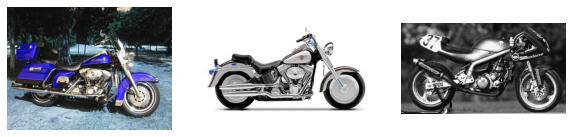

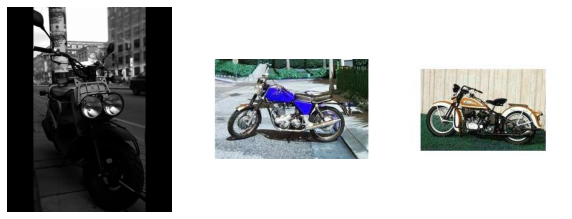

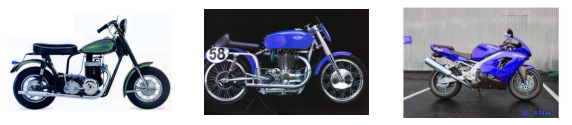

In [ ]:
multipleImages = glob(path+'1/**')
def plotThreeImages(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(10,10))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.axis('off')
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])); 
    plt.axis('off')
plotThreeImages(multipleImages)
plotThreeImages(multipleImages)
plotThreeImages(multipleImages)

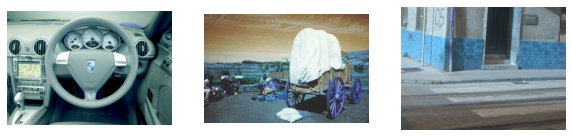

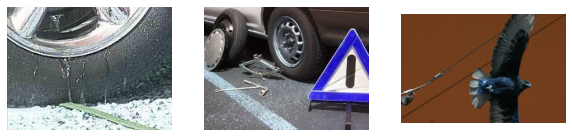

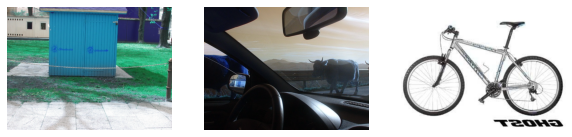

In [ ]:
multipleImages = glob(path+'0/**')
def plotThreeImages(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(10,10))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.axis('off')
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])); 
    plt.axis('off')
plotThreeImages(multipleImages)
plotThreeImages(multipleImages)
plotThreeImages(multipleImages)

[1631, 1218]


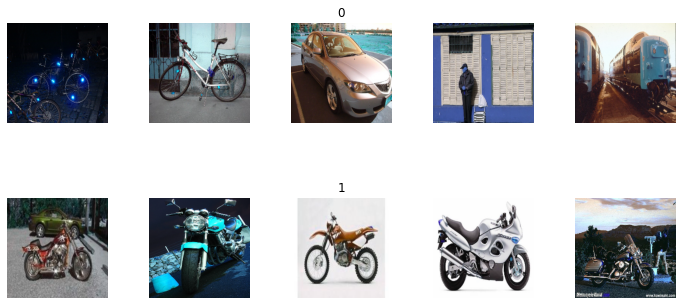

In [ ]:
num_of_samples=[]
cols = 5
num_classes = 2
labels = [0,1]
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(10,5))
fig.tight_layout()
y_data = np.argmax(y_train , axis=-1)
 
for i in range(cols):
    for j in labels:
      x_selected = X_train[y_data == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))
print(num_of_samples)

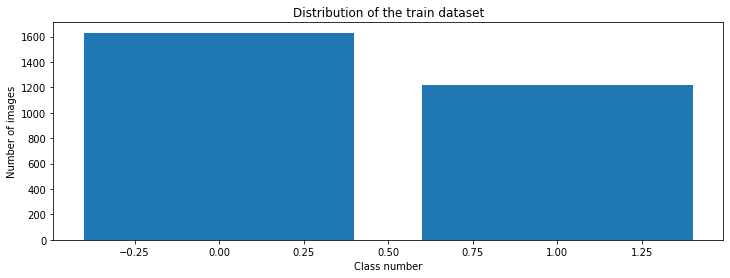

In [ ]:
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [ ]:
def preprocess(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img

(2849, 224, 224)


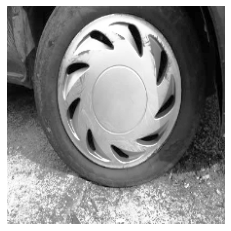

In [ ]:
X_train1 = np.array(list(map(preprocess, X_train)))
X_test1 = np.array(list(map(preprocess, X_test)))
X_val1 = np.array(list(map(preprocess, X_val)))
 
plt.imshow(X_train1[random.randint(0, len(X_train1) - 1)], cmap=plt.get_cmap('gray'))
plt.axis('off')
 
print(X_train1.shape)

In [ ]:
n,x,y = X_train.shape[:3]
X_train1 = X_train1.reshape(n, x, y, 1)
n,x,y = X_test.shape[:3]
X_test1 = X_test1.reshape(n, x, y, 1)
n,x,y = X_val.shape[:3]
X_val1 = X_val1.reshape(n, x, y, 1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
 
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.4,
                            shear_range=0.2,
                            rotation_range=10.)
datagen_val = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.4,
                            shear_range=0.2,
                            rotation_range=10.)
 
datagen.fit(X_train)
datagen_val.fit(X_val)

In [ ]:
datagen.flow(X_train, y_train, batch_size=50)

In [ ]:
#@title
# # create model
# def modified_model():
#   model = Sequential()
#   model.add(Conv2D(60, (5, 5), input_shape=(224, 224, 1),activation='relu'))
#   model.add(Conv2D(60, (5, 5), activation='relu'))
#   model.add(MaxPooling2D(pool_size=(2, 2)))

#   model.add(Conv2D(30, (3, 3), activation='relu'))
#   model.add(Conv2D(30, (3, 3), activation='relu'))
#   model.add(MaxPooling2D(pool_size=(2, 2)))

#   model.add(Flatten())
#   model.add(Dense(500, activation='relu'))
#   model.add(Dropout(0.5))
#   model.add(Dense(2, activation='softmax'))

#   model.compile(Adam( learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
#   return model

In [ ]:
def modified_model(): 
  model=keras.models.Sequential([
      keras.layers.Conv2D(filters=512, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(2,2)),

      keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="valid"),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(3,3)),

      keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="valid"),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="valid"),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="valid"),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(2,2)),


      keras.layers.Flatten(),
      keras.layers.Dense(2048,activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1024,activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1024,activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(2,activation='softmax')
  ])
  model.compile(Adam(0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
  return model

In [ ]:
# model = modified_model()
model = modified_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 54, 54, 512)       186368    
_________________________________________________________________
batch_normalization_5 (Batch (None, 54, 54, 512)       2048      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 512)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 23, 23, 256)       3277056   
_________________________________________________________________
batch_normalization_6 (Batch (None, 23, 23, 256)       1024      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 5, 5, 256)        

In [ ]:
#@title
# Helper Functions for Learning Curve and Confusion Matrix

from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

class MetricsCheckpoint(Callback):
    """Callback that saves metrics after each epoch"""
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

def plotKerasLearningCurve():
    plt.figure(figsize=(10,5))
    metrics = np.load('logs.npy')[()]
    filt = ['acc'] # try to add 'loss' to see the loss learning curve
    for k in filter(lambda x : np.any([kk in x for kk in filt]), metrics.keys()):
        l = np.array(metrics[k])
        plt.plot(l, c= 'r' if 'val' not in k else 'b', label='val' if 'val' in k else 'train')
        x = np.argmin(l) if 'loss' in k else np.argmax(l)
        y = l[x]
        plt.scatter(x,y, lw=0, alpha=0.25, s=100, c='r' if 'val' not in k else 'b')
        plt.text(x, y, '{} = {:.4f}'.format(x,y), size='15', color= 'r' if 'val' not in k else 'b')   
    plt.legend(loc=4)
    plt.axis([0, None, None, None]);
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.ylabel('Accuracy')

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_learning_curve(history):
    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'Val'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve.png')

In [ ]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=50),
                               validation_data=datagen_val.flow(X_val, y_val, batch_size=50),
                               epochs=135, 
                               shuffle = 1, 
                               verbose =1)

Epoch 1/135
57/57 [==============================] - 81s 574ms/step - loss: 0.9088 - accuracy: 0.6418 - val_loss: 0.8307 - val_accuracy: 0.4570
Epoch 2/135
57/57 [==============================] - 29s 509ms/step - loss: 0.5276 - accuracy: 0.7827 - val_loss: 0.4898 - val_accuracy: 0.7543
Epoch 3/135
57/57 [==============================] - 29s 507ms/step - loss: 0.3717 - accuracy: 0.8478 - val_loss: 0.4078 - val_accuracy: 0.8034
Epoch 4/135
57/57 [==============================] - 29s 507ms/step - loss: 0.3116 - accuracy: 0.8754 - val_loss: 0.2998 - val_accuracy: 0.8722
Epoch 5/135
57/57 [==============================] - 29s 509ms/step - loss: 0.3186 - accuracy: 0.8725 - val_loss: 0.2960 - val_accuracy: 0.8870
Epoch 6/135
57/57 [==============================] - 29s 504ms/step - loss: 0.3338 - accuracy: 0.8675 - val_loss: 0.2478 - val_accuracy: 0.8943
Epoch 7/135
57/57 [==============================] - 29s 508ms/step - loss: 0.2974 - accuracy: 0.8826 - val_loss: 0.2313 - val_accuracy:

In [ ]:
!pip install -q pyyaml h5py
!mkdir -p saved_model
model.save('saved_model/alexnet_night')
!zip -r /content/alexnet_night.zip /content/saved_model/alexnet_night

INFO:tensorflow:Assets written to: saved_model/alexnet_night/assets
  adding: content/saved_model/alexnet_night/ (stored 0%)
  adding: content/saved_model/alexnet_night/assets/ (stored 0%)
  adding: content/saved_model/alexnet_night/keras_metadata.pb (deflated 94%)
  adding: content/saved_model/alexnet_night/saved_model.pb (deflated 90%)
  adding: content/saved_model/alexnet_night/variables/ (stored 0%)
  adding: content/saved_model/alexnet_night/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/saved_model/alexnet_night/variables/variables.index (deflated 75%)


In [ ]:
from google.colab import files
files.download('alexnet_night.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title
# history2 = model.fit(X_train1, 
#                     y_train, 
#                     batch_size=50,
#                     epochs=10,
#                     verbose = 1,
#                     validation_data=(X_val1, y_val), 
#                     shuffle = 1)

In [ ]:
# model = models.load_model('Object-classification-using-cnn-motorcycle/alexnet_11am')
# model.summary()

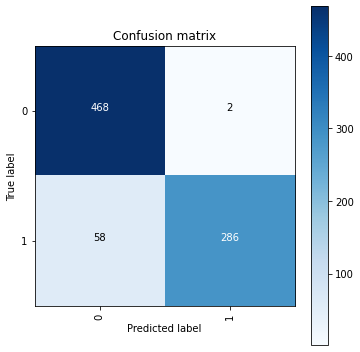

In [ ]:
y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = list(labels))

In [ ]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       464
           1       0.98      0.87      0.92       350

    accuracy                           0.94       814
   macro avg       0.95      0.93      0.94       814
weighted avg       0.94      0.94      0.94       814



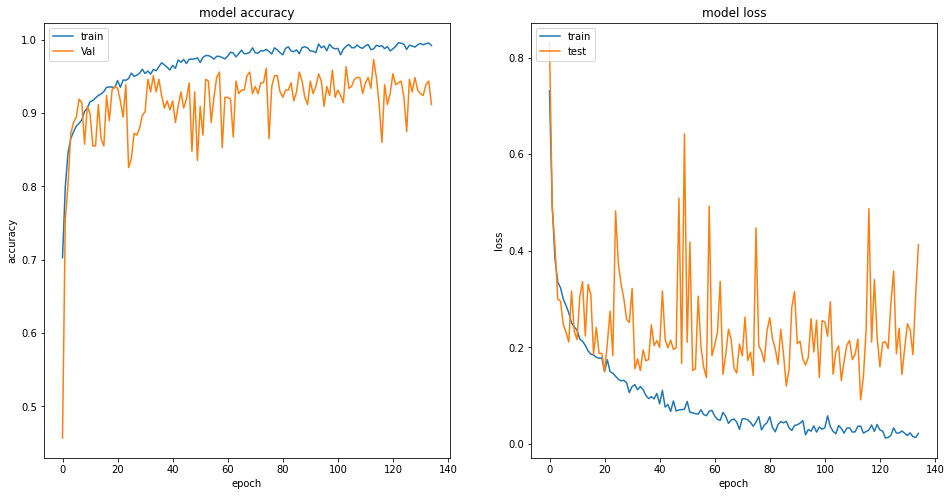

In [ ]:
plot_learning_curve(history)

In [ ]:
# TODO: Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.26596179604530334
Test accuracy: 0.9262899160385132


(224, 224, 3)
predicted sign: [0]


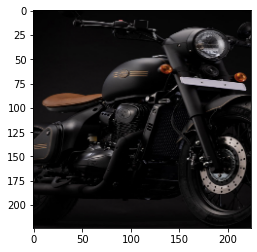

In [ ]:
import requests
from PIL import Image
url = 'https://images.jawamotorcycles.com/medium/m/perak/jawa-perak.png?v=1'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
img = np.asarray(img)
img = cv2.resize(img, (224, 224))
# img = preprocess(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 224, 224, 3)

print("predicted sign: "+ str(np.argmax(model.predict(img), axis=-1)))

(261, 500, 3)
(224, 224, 3)
predicted sign: [1]


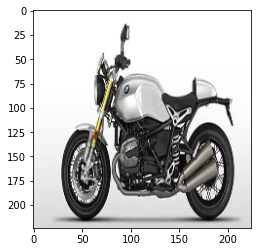

In [ ]:
import requests
from PIL import Image
url = 'https://static.autox.com/uploads/bikes/2021/02/bmw-r-ninet.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
img = np.asarray(img)
print(img.shape)
img = cv2.resize(img, (224, 224))
# img = preprocess(img)
plt.imshow(img)
print(img.shape)
img = img.reshape(1, 224, 224, 3)

print("predicted sign: "+ str(np.argmax(model.predict(img), axis=-1)))